# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier


---
## Step 0: Load The Data

In [26]:
import numpy as np
import tensorflow as tf
import time
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import pandas as pd
import random

# sklearn imports to shuffle and split data
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

#import to flatten
from tensorflow.contrib.layers import flatten

# Load pickled data
import pickle

# dictionary of signs

sign_dictionary ={'0': 'Speed limit (20km/h)',
'1':'Speed limit (30km/h)',
'2':'Speed limit (50km/h)',
'3':'Speed limit (60km/h)',
'4':'Speed limit (70km/h)',
'5':'Speed limit (80km/h)',
'6':'End of speed limit (80km/h)',
'7':'Speed limit (100km/h)',
'8':'Speed limit (120km/h)',
'9':'No passing',
'10':'No passing for vehicles over 3.5 metric tons',
'11':'Right-of-way at the next intersection',
'12':'Priority road',
'13':'Yield',
'14':'Stop',
'15':'No vehicles',
'16':'Vehicles over 3.5 metric tons prohibited',
'17':'No entry',
'18':'General caution',
'19':'Dangerous curve to the left',
'20':'Dangerous curve to the right',
'21':'Double curve',
'22':'Bumpy road',
'23':'Slippery road',
'24':'Road narrows on the right',
'25':'Road work',
'26':'Traffic signals',
'27':'Pedestrians',
'28':'Children crossing',
'29':'Bicycles crossing',
'30':'Beware of ice/snow',
'31':'Wild animals crossing',
'32':'End of all speed and passing limits',
'33':'Turn right ahead',
'34':'Turn left ahead',
'35':'Ahead only',
'36':'Go straight or right',
'37':'Go straight or left',
'38':'Keep right',
'39':'Keep left',
'40':'Roundabout mandatory',
'41':'End of no passing',
'42':'End of no passing by vehicles over 3.5 metric tons'}

# Fill this in based on where you saved the training and testing data

training_file = "traffic-signs-data/train.p"
testing_file = "traffic-signs-data/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image.
**THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [27]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# Number of training examples
n_train = len(X_train)

# Number of testing examples
n_test = len(X_test)

# Checking that we have as many labels as data
assert(len(X_train)== len(y_train))
assert(len(X_test)== len(y_test))

# The shape of an traffic sign image: It returns a tuple of number of rows, columns and channels
image_shape = X_train[0].shape

# Unique classes/labels in the dataset:
# First we remove duplicates then we count
n_classes = len(set(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Number of classes =", n_classes)
print("Image data shape =", image_shape)

if (image_shape[0]!=32):
    print ("RESIZE NEEDED!! LeNET takes in input 32x32 pixels images")
if (image_shape[2]!=1):
    print ("COLOR MAP CHANGE NEEDED!! LeNET takes Gray Scale images")


Number of training examples = 39209
Number of testing examples = 12630
Number of classes = 43
Image data shape = (32, 32, 3)
COLOR MAP CHANGE NEEDED!! LeNET takes Gray Scale images


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

 VISUALIZING TRAINING SET
index is 28
Dico of element Children crossing
index is 1
Dico of element Speed limit (30km/h)
index is 9
Dico of element No passing
index is 19
Dico of element Dangerous curve to the left
index is 11
Dico of element Right-of-way at the next intersection
index is 25
Dico of element Road work
index is 18
Dico of element General caution
index is 26
Dico of element Traffic signals
index is 22
Dico of element Bumpy road
index is 25
Dico of element Road work
index is 8
Dico of element Speed limit (120km/h)
index is 3
Dico of element Speed limit (60km/h)
index is 5
Dico of element Speed limit (80km/h)
index is 12
Dico of element Priority road
index is 3
Dico of element Speed limit (60km/h)
index is 4
Dico of element Speed limit (70km/h)


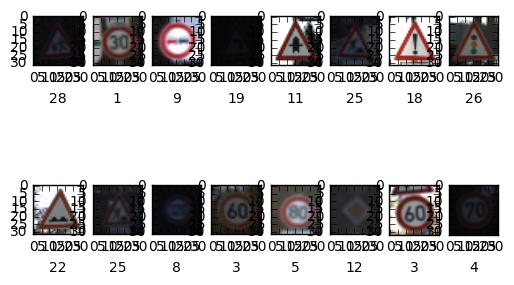

In [41]:
# Visualizing randomly 16 images from the training set

print (" VISUALIZING TRAINING SET")
for i in range(16):
    plt.subplot(2,8,i+1)
    index = random.randint(0,n_train)
    plt.imshow(X_train[index])
    plt.xlabel(y_train[index])
    str_index=str(y_train[index])
    print ("index is",str_index )
    print ("Dico of element",sign_dictionary[str_index])

   
plt.show()    

 VISUALIZING TESTING SET
index is 16
Dico of element Vehicles over 3.5 metric tons prohibited
index is 1
Dico of element Speed limit (30km/h)
index is 13
Dico of element Yield
index is 2
Dico of element Speed limit (50km/h)


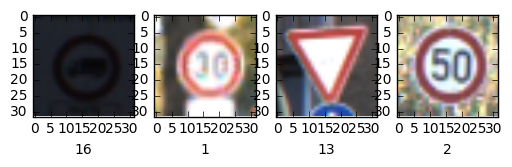

In [25]:
# Visualizing randomly 4 images from the test set


print (" VISUALIZING TESTING SET")
for i in range(4):
    plt.subplot(2,4,i+1)
    index = random.randint(0,n_test)
    plt.imshow(X_test[index])
    plt.xlabel(y_test[index])
    str_index=str(y_test[index])
    print ("index is",str_index )
    print ("Dico of element",sign_dictionary[str_index])

   
plt.show()    




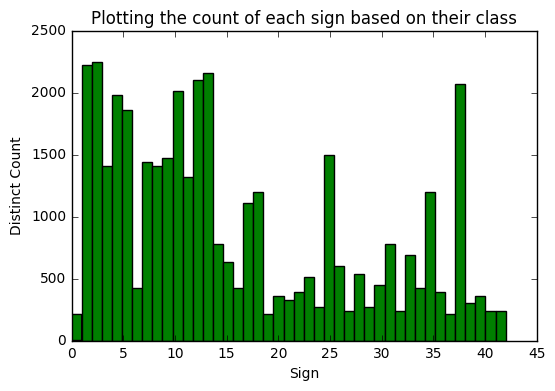

In [42]:
# plotting the count of each sign is equivalent to plot get a frequency graph (if labelling is correct)

# This is  the colormap I'd like to use.
cm = plt.cm.get_cmap('RdYlBu_r')

plt.hist(y_train, n_classes, color='green')

plt.title('Plotting the count of each sign based on their class')
plt.xlabel('Sign')
plt.ylabel('Distinct Count')
plt.plot()

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

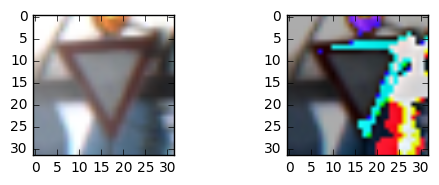

In [43]:
###### LeNet ARCHITECTURE #########
# INPUT -> CONV -> ACT -> POOL -> CONV -> ACT -> POOL -> FLATTEN -> FC -> ACT -> FC
# LeNET architecture accepts only 32x32xC images, here is in the good format, no padding needed

# Preprocess the data here. Preprocessing steps could include normalization, converting to grayscale, etc.
# NORMALIZATION OF DATA: colors on a 0-255 scale => 0-1 scale
# Follows the equation normalized = (x - min( x )) / (max ( x )- min( x ))


X_train_norm = X_train
X_test_norm = X_test

X_train_norm = (X_train - X_train.mean())/(np.max(X_train) - np.min(X_train))
X_test_norm = (X_test - X_test.mean())/(np.max(X_test) - np.min(X_test))


index=random.randint(0,n_train)
plt.subplot(2,2,1)
plt.imshow(X_train[index])

plt.subplot(2,2,2)
plt.imshow(X_train_norm[index])

plt.show()



### Split Data into Training, Validation and Testing Sets

In [44]:
### Split the data into training/validation/testing sets here.
### Before splitting we shuffle the cards using scikit examples:
## http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
## http://scikit-learn.org/stable/modules/generated/sklearn.utils.shuffle.html

      
#shuffling the Data
X_train_norm, y_train = shuffle(X_train_norm, y_train)
print("DATA SHUFFLED --")

# SPLITTING THE DATA using 20% to create the validation set
X_train_norm, X_val, y_train, y_val = train_test_split(X_train_norm, y_train, test_size=0.2, random_state=42)
print ("DATA SPLIT --")



DATA SHUFFLED --
DATA SPLIT --


# Model Architecture: LeNET  and Question 3


Patch Size: 5x5
Padding = VALID

Layer 1: Convolutional. The output shape should be 28x28x32.
Activation. RELU
Pooling. The output shape should be 14x14x32.


Layer 2: Convolutional. The output shape should be 10x10x16.
Activation. RELU
Pooling. The output shape should be 5x5x16.
Flatten. Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using tf.contrib.layers.flatten.

Layer 3: Fully Connected. This should have 120 outputs.
Activation. RELU


Layer 4: Fully Connected. This should have 84 outputs.
Activation. RELU

Layer 5: Fully Connected (Logits). This should have 43 outputs.



In [45]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

EPOCHS =20
BATCH_SIZE=256

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    patch_size = 5
    channels = 3 # channels is the 3 colors depth of the image
    filter_depth = 32 
    drop_pool_down_sizing=0.8 # keep 80% f neurons

    
 
    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x32. 
    # Weights are initialzed first
    conv1_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, channels, filter_depth), mean = mu, stddev = sigma))
    # Bias is initialized to zero 
    conv1_b = tf.Variable(tf.zeros(filter_depth))
    # conv1=XW+1
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    print ("shape of conv1-a", conv1.get_shape().as_list())

    # Activation with a RELU function to make the network non linear
    conv1 = tf.nn.relu(conv1)

    # Pooling. Input = 28x28x32. Output = 14x14x32 to reduce the size of the network
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv1 = tf.nn.dropout(conv1, drop_pool_down_sizing)
    print ("shape of conv1-b", conv1.get_shape().as_list())
    
    # Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(patch_size, patch_size, filter_depth, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    print ("shape of conv2-a", conv2.get_shape().as_list())
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    print ("shape of conv2-b", conv2.get_shape().as_list())

    # flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    print ("shape of fc0", fc0.get_shape().as_list())

    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    print ("shape of fc1", fc1.get_shape().as_list())

    # Activation.
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SActivation.
    fc2    = tf.nn.relu(fc2)

    # Layer 5: Fully Connected. Input = 84. Output = 43
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the test set but low accuracy on the validation set implies overfitting.

In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

# Creating a placeholder variable to hold input images, depth of 3 as we keep the three colors
x_input = tf.placeholder("float", [None, 32, 32, 3])

# Creating a placeholder variable to hold labels
y_labels = tf.placeholder("int32", [None])

# To one-hot encode the labels 
y_one_hot = tf.one_hot(y_labels, depth=43, on_value=1., off_value=0., axis=-1)

# CONSTRUCT THE MODEL USING the LeNET model
rate= 0.0009
logits= LeNet(x_input)

# Define loss and optimizer
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, y_one_hot)
loss_operation= tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate=rate)
training_operation=optimizer.minimize(loss_operation)

# Model Evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_one_hot, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x_input: batch_x, y_labels: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

# Train the MODEL
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train_norm, y_train = shuffle(X_train_norm, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train_norm[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x_input: batch_x, y_labels: batch_y})
            
        validation_accuracy = evaluate(X_val, y_val)   
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")
    

shape of conv1-a [None, 28, 28, 32]
shape of conv1-b [None, 14, 14, 32]
shape of conv2-a [None, 10, 10, 16]
shape of conv2-b [None, 5, 5, 16]
shape of fc0 [None, 400]
shape of fc1 [None, 120]
Training...

EPOCH 1 ...
Validation Accuracy = 0.379

EPOCH 2 ...
Validation Accuracy = 0.553

EPOCH 3 ...
Validation Accuracy = 0.824

EPOCH 4 ...
Validation Accuracy = 0.726

EPOCH 5 ...
Validation Accuracy = 0.840

EPOCH 6 ...
Validation Accuracy = 0.833

EPOCH 7 ...
Validation Accuracy = 0.833

EPOCH 8 ...
Validation Accuracy = 0.899

EPOCH 9 ...
Validation Accuracy = 0.919

EPOCH 10 ...
Validation Accuracy = 0.907

EPOCH 11 ...
Validation Accuracy = 0.933

EPOCH 12 ...
Validation Accuracy = 0.847

EPOCH 13 ...
Validation Accuracy = 0.956

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.921

EPOCH 16 ...
Validation Accuracy = 0.965

EPOCH 17 ...
Validation Accuracy = 0.959

EPOCH 18 ...
Validation Accuracy = 0.942

EPOCH 19 ...
Validation Accuracy = 0.897

EPOCH 

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

Image : <class 'numpy.ndarray'> Dimensions: (232, 217, 3)


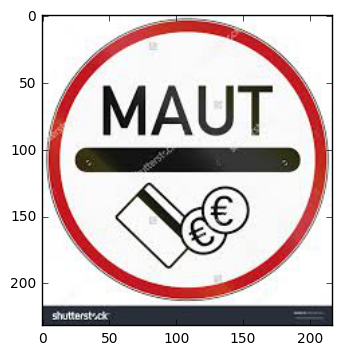

Image : <class 'numpy.ndarray'> Dimensions: (225, 225, 3)


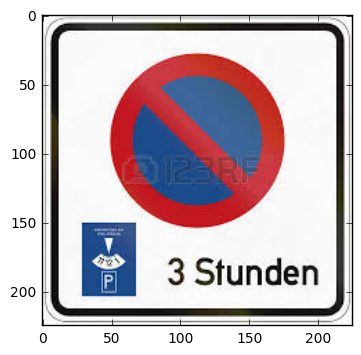

Image : <class 'numpy.ndarray'> Dimensions: (183, 275, 3)


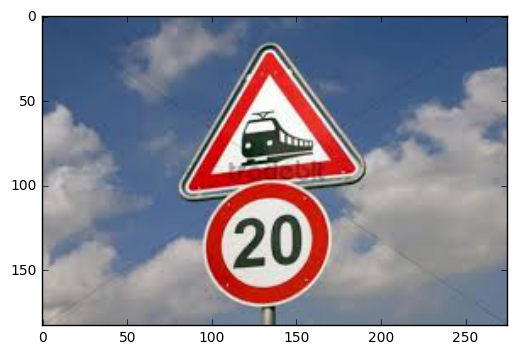

Image : <class 'numpy.ndarray'> Dimensions: (232, 217, 3)


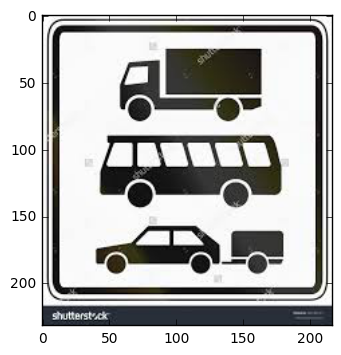

Image : <class 'numpy.ndarray'> Dimensions: (193, 262, 3)


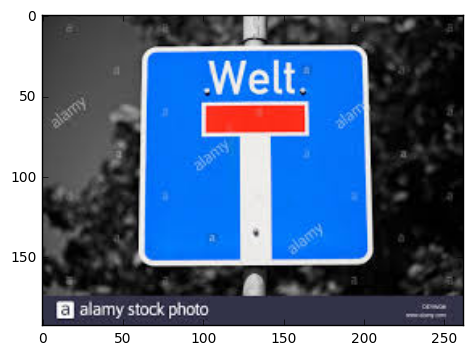

In [10]:
### Load the images from german_signs, display them and add them to the training set

def display_sign(path):
    image = mpimg.imread(path)
    print('Image :', type(image), 'Dimensions:', image.shape)
    plt.imshow(image)  
    plt.show()

display_sign('german_signs/money_sign.jpeg')
display_sign('german_signs/studen_sign.jpeg')
display_sign('german_signs/train_sign.jpeg')
display_sign('german_signs/truck_sign.jpeg')
display_sign('german_signs/welt_sign.jpeg')

### Predict the Sign Type for Each Image

In [11]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

german_labels = [14, ?, 0, ?, ?, x, x, x]


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    my_accuracy = evaluate(my_images_normalized, my_labels)
    print("Test Set Accuracy = {:.3f}".format(my_accuracy))

SyntaxError: invalid syntax (<ipython-input-11-4e83162eac76>, line 5)

### Analyze Performance

In [ ]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [ ]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the IPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 